In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./data/augmented_df.csv')
df.head()
X, y = df['text'].values, df['SUBTYPE'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420, stratify=False)

In [28]:
len(X_train), len(y_train)

(725, 725)

In [4]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [33]:
print(labels)

['hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-'
 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+her2-' 'hr+he

In [34]:
df['SUBTYPE'].unique()

array(['hr+her2+', 'hr+her2-', 'hr-'], dtype=object)

Text(113.9222222222222, 0.5, 'predicted label')

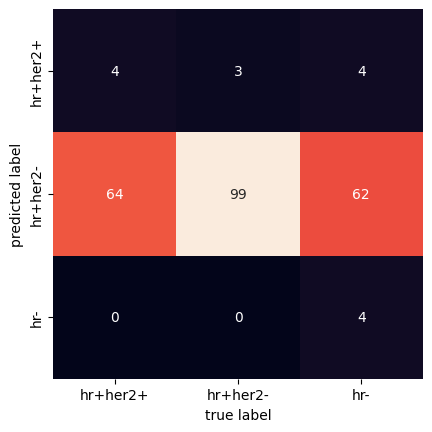

In [5]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=df['SUBTYPE'].unique(), yticklabels=df['SUBTYPE'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label')